<h1 style="color:rgb(0,120,170)">Neural Networks and Deep Learning</h1>
<h2 style="color:rgb(0,120,170)">Intro to Tensor Flow and Keras - simple model</h2>


In [ ]:
!pip install -U tensorflow tensorboard

  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)


In [1]:
import os
import sys
import re
import time
import datetime
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorboard.plugins.hparams import api_pb2
from tensorboard.plugins.hparams import summary as hparams_summary

from google.protobuf import struct_pb2

%load_ext tensorboard
%matplotlib inline

In [ ]:
print(tf.__version__)

os.environ['CUDA_VISIBLE_DEVICES'] = "0"

try:
    physical_devices = tf.config.list_physical_devices('GPU')
    #tf.config.experimental.set_memory_growth(physical_devices[0], True)
    for device in physical_devices:
        tf.config.experimental.set_memory_growth(device, True)
    print(physical_devices)
except:
    print("No GPU")

2.17.0
[]


2024-10-21 23:36:28.319858: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-10-21 23:36:28.319880: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:135] retrieving CUDA diagnostic information for host: vienna
2024-10-21 23:36:28.319887: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:142] hostname: vienna
2024-10-21 23:36:28.319969: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:166] libcuda reported version is: 550.120.0
2024-10-21 23:36:28.319987: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:170] kernel reported version is: 550.120.0
2024-10-21 23:36:28.319993: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:249] kernel version seems to match DSO: 550.120.0


In [2]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

First we'll develop a small ANN with Keras:

In [7]:
# prompt: load in the variable "datasets" the famous pima indians diabetes csv dataset

import pandas as pd
dataset = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv', header=None)


In [3]:
# load pima indians dataset
dataset = np.loadtxt("../../../data/pima-indians-diabetes.csv", delimiter=",")

FileNotFoundError: ../../../data/pima-indians-diabetes.csv not found.

In [8]:
dataset

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
dataset = dataset.values
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [11]:
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

In [12]:
X.shape

(768, 8)

In [13]:
Y.shape

(768,)

In [14]:
#https://www.tensorflow.org/api_docs/python/tf/keras/layers
#https://www.tensorflow.org/api_docs/python/tf/keras/activations
#https://www.tensorflow.org/api_docs/python/tf/keras/initializers
#https://www.tensorflow.org/api_docs/python/tf/keras/losses
#https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
#https://www.tensorflow.org/api_docs/python/tf/keras/metrics

# Create model
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(12, input_dim=8, activation="relu", kernel_initializer="uniform"))
model.add(tf.keras.layers.Dense(8, activation="relu", kernel_initializer="uniform"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid", kernel_initializer="uniform"))

In [15]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Fit the model
history = model.fit(X, Y, validation_split=0.20, epochs=400, batch_size=64, verbose=1)

Epoch 1/400
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.3698 - loss: 0.6959 - val_accuracy: 0.6169 - val_loss: 0.6922
Epoch 2/400
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6590 - loss: 0.6909 - val_accuracy: 0.6429 - val_loss: 0.6889
Epoch 3/400
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6518 - loss: 0.6876 - val_accuracy: 0.6429 - val_loss: 0.6849
Epoch 4/400
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6537 - loss: 0.6829 - val_accuracy: 0.6429 - val_loss: 0.6795
Epoch 5/400
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6599 - loss: 0.6754 - val_accuracy: 0.6429 - val_loss: 0.6741
Epoch 6/400
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6680 - loss: 0.6665 - val_accuracy: 0.6429 - val_loss: 0.6709
Epoch 7/400
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6499 - loss: 0.6668 - val_accuracy: 0.6429 - val_loss: 0.6708
Epoch 8/400
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6561 - loss: 0.6574 - val_accuracy: 0.6494

In [19]:
# list all data in history
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


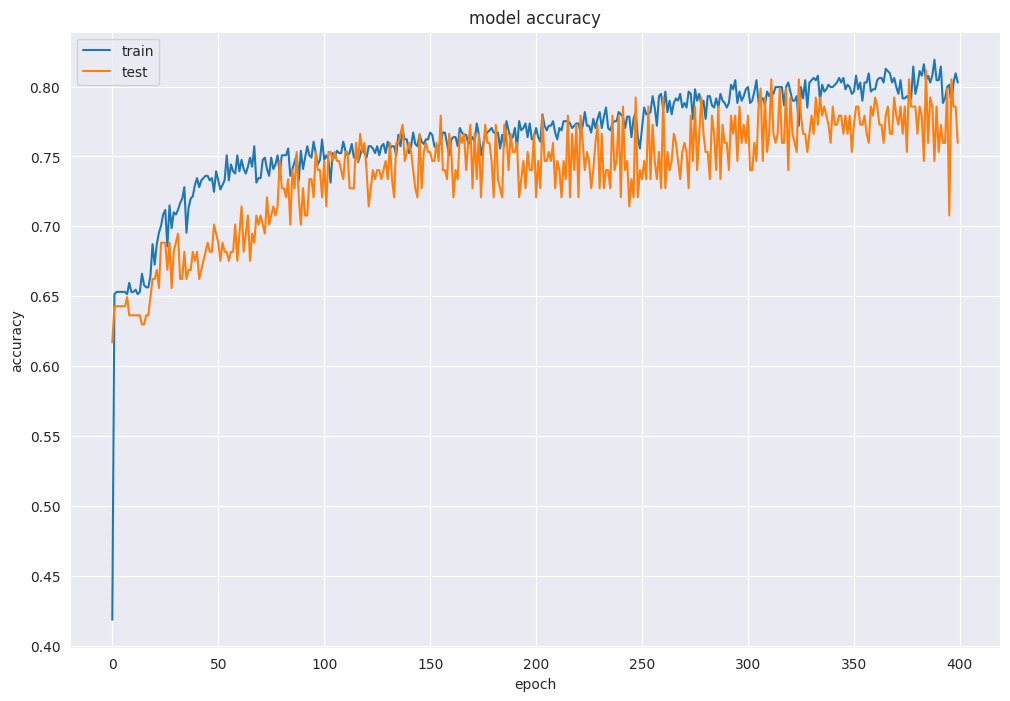

In [20]:
# summarize history for accuracy
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

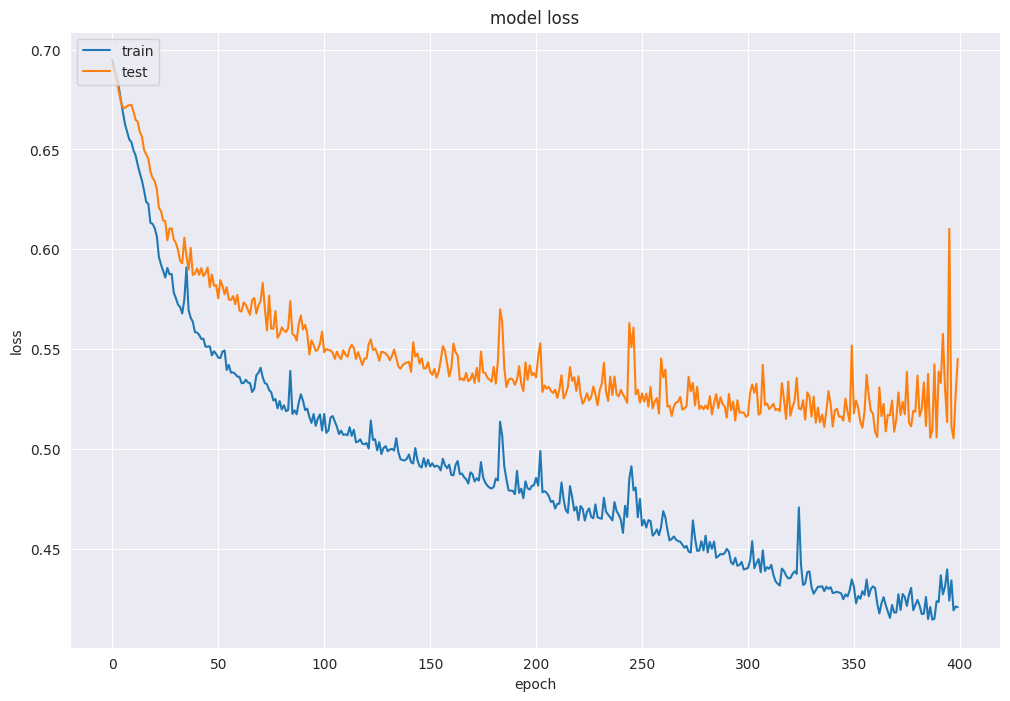

In [21]:
# summarize history for loss
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
# evaluate the model
scores = model.evaluate(X, Y)
print("\n{}: {}".format(model.metrics_names[1], scores[1]*100))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7773 - loss: 0.4723

compile_metrics: 79.03645634651184


In [23]:
# calculate predictions
predictions = model.predict(X)
rounded = [round(x[0]) for x in predictions]

for pred in list(zip(predictions[0:10], rounded[0:10])):
    print(pred)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
(array([0.5276759], dtype=float32), 1)
(array([0.05080824], dtype=float32), 0)
(array([0.8580258], dtype=float32), 1)
(array([0.0484645], dtype=float32), 0)
(array([0.8945621], dtype=float32), 1)
(array([0.15216012], dtype=float32), 0)
(array([0.07432789], dtype=float32), 0)
(array([0.4292766], dtype=float32), 0)
(array([0.63999534], dtype=float32), 1)
(array([0.04099075], dtype=float32), 0)
